# Customers Segmentation

A wholesale distributor recently tested a change to their delivery method for some customers, by moving from a morning delivery service five days a week to a cheaper evening delivery service three days a week.Initial testing did not discover any significant unsatisfactory results, so they implemented the cheaper option for all customers. Almost immediately, the distributor began getting complaints about the delivery service change and customers were canceling deliveries — losing the distributor more money than what was being saved. You’ve been hired by the wholesale distributor to find what types of customers they have to help them make better, more informed business decisions in the future. Your task is to use unsupervised learning techniques to see if any similarities exist between customers, and how to best segment customers into distinct categories.  
The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.


In [1]:
# import library:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import dataset:
data = pd.read_csv("customers.csv", sep = ',')
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [3]:
#data exploring:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


In [4]:
data.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [5]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

## Data Preprocessing:

In [7]:
# StandardScaler/ standardized:
##import library: 
from sklearn.preprocessing import StandardScaler

#define scaler function:
scaler = StandardScaler()

#fit dataset to scaler function:
scaler.fit(data)

#transform dataset: 
sc = scaler.transform(data)
sc = pd.DataFrame(sc, columns=data.columns)

In [8]:
sc

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
5,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224
6,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854
7,-0.349981,-0.113981,0.155359,-0.289315,0.092286,0.369601
8,-0.477901,-0.291409,-0.185336,-0.545854,-0.244726,-0.275079
9,-0.474497,0.718495,1.151423,-0.394488,0.954031,0.203461


# Build KMean model:
## How to choose the best number of clusters?

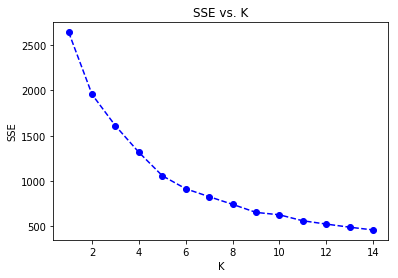

In [9]:
# A place for your work - create a scree plot - you will need to
# Fit a kmeans model with changing k from 1-10
# Obtain the score for each model (take the absolute value)
# Plot the score against k
from sklearn.cluster import KMeans
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

scores = []
centers = list(range(1,15))

for center in centers:
    scores.append(get_kmeans_score(sc, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

In [10]:
#build the model:
#intiate a model with k cluster
k = 2
kmean = KMeans(n_clusters=k, random_state=0)

# Fit the model to your data using the fit method
kmean.fit(data)

# Finally predict the labels
kmean_predicted = kmean.predict(data)

In [11]:
# Save the new dataset with corresponding labels:
data['Labels'] = kmean_predicted
data.to_csv('customers_labeled.csv')
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Labels
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,1


In [12]:
data2 = pd.read_csv("customers_labeled.csv", sep = ',')
data2.head()

,Unnamed: 0,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Labels
0,0,12669,9656,7561,214,2674,1338,0
1,1,7057,9810,9568,1762,3293,1776,0
2,2,6353,8808,7684,2405,3516,7844,0
3,3,13265,1196,4221,6404,507,1788,0
4,4,22615,5410,7198,3915,1777,5185,1
